## Problem 41 - pandigital primes

<p>We shall say that an $n$-digit number is pandigital if it makes use of all the digits $1$ to $n$ exactly once. For example, $2143$ is a $4$-digit pandigital and is also prime.</p>
<p>What is the largest $n$-digit pandigital prime that exists?</p>


In [1]:
import numpy as np
from sympy import isprime
import tqdm
import sys

In [2]:
%%time
##THIS ENTIRE SOLUTION IS TOO SLOW! DONT RUN THIS! It works but takes almost 15 minutes.
# def is_pandigital(x: int) -> bool:
#     x = str(x)
#     if "0" in x:
#         return False
#     if sorted(x) == [str(n+1) for n in range(len(x))]:
#         return True
#     return False

##max to check is a nine digit prime, so we have to make all primes up to 987654321
# primes_to_check = [x for x in np.arange(2,987654321,1) if is_pandigital(x)]

# len(primes_to_check)

# ps = [p for p in primes_to_check if isprime(p)]

# print(max(ps))

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.38 µs


After failing to optimise my own solution I read through the Euler forums for problem 41 and came across the claim "If the sum of digits of a number is divisible by 3, the number itself is divisible by 3, and therefore not a prime".

With this idea we can find how many digits a pandigital can have and still be prime:

In [3]:
digits = [1,2,3,4,5,6,7,8,9]
for win in range(1, 10):
    pdd = digits[0:win]
    s = sum(pdd)
    if s%3 == 0:
        print(f"A {win} digit pandigital sums to {s}, {s}%3 = 0. \tA {win}-digit pandigital will never be prime")
    if s%3 != 0:
        print(f"A {win} digit pandigital sums to {s}, {s}%3 = 0. \tA {win}-digit pandigital might be prime")
        

A 1 digit pandigital sums to 1, 1%3 = 0. 	A 1-digit pandigital might be prime
A 2 digit pandigital sums to 3, 3%3 = 0. 	A 2-digit pandigital will never be prime
A 3 digit pandigital sums to 6, 6%3 = 0. 	A 3-digit pandigital will never be prime
A 4 digit pandigital sums to 10, 10%3 = 0. 	A 4-digit pandigital might be prime
A 5 digit pandigital sums to 15, 15%3 = 0. 	A 5-digit pandigital will never be prime
A 6 digit pandigital sums to 21, 21%3 = 0. 	A 6-digit pandigital will never be prime
A 7 digit pandigital sums to 28, 28%3 = 0. 	A 7-digit pandigital might be prime
A 8 digit pandigital sums to 36, 36%3 = 0. 	A 8-digit pandigital will never be prime
A 9 digit pandigital sums to 45, 45%3 = 0. 	A 9-digit pandigital will never be prime


Therefore we know we only have to check 7-digit and 4 digit pandigitals which reduces the search space. I have been trying to understand _why_ it is true that if the sum of digits is divisible by three the number is divisible by three, but I`d be lying if I said I really understand it.

In [4]:
%%time
#Check the 7 digit search space
from itertools import permutations
seven_digit_pandigitals = [int("".join(x)) for x in permutations("1234567")]
seven_digit_pandigitals = np.sort(seven_digit_pandigitals)[::-1]

for sdp in seven_digit_pandigitals:
    if isprime(sdp):
        print(f"The largest n-digit pandigital prime is {sdp}")
        break

The largest n-digit pandigital prime is 7652413
CPU times: user 807 µs, sys: 729 µs, total: 1.54 ms
Wall time: 1.48 ms


This is so much more efficient, but I would not have known the divide by three trick without help.

## Problem 42 - Coded Triangle Numbers:

<p>The $n$<sup>th</sup> term of the sequence of triangle numbers is given by, $t_n = \frac12n(n+1)$; so the first ten triangle numbers are:
$$1, 3, 6, 10, 15, 21, 28, 36, 45, 55, \dots$$</p>
<p>By converting each letter in a word to a number corresponding to its alphabetical position and adding these values we form a word value. For example, the word value for SKY is $19 + 11 + 25 = 55 = t_{10}$. If the word value is a triangle number then we shall call the word a triangle word.</p>

Using [words.txt](https://www.projecteuler.net/resources/documents/0042_words.txt), a 16K text file containing nearly two-thousand common English words, how many are triangle words?</p>

In [5]:
import urllib
import numpy as np

In [7]:
#read in the linked file
with urllib.request.urlopen("https://www.projecteuler.net/resources/documents/0042_words.txt") as f:
    text = f.read()
#format the text into a list of bare words
text = text.decode()
text = text.replace('"', '')
text = text.split(",")
print(f"Read in the word list of {len(text)} words")


Read in the word list of 1786 words


In [8]:
%%time

#create a dict with letterscores
letter_scores = {letter: c+1 for c, letter in enumerate("ABCDEFGHIJKLMNOPQRSTUVWXYZ")}

#function to score a word with the score dict
def sum_word(word):
    return(sum([letter_scores[letter] for letter in word]))

#get a list of triangle numbers to reference
triangle_numbers = np.cumsum(np.arange(100)) #gives us triangle numbers up to 210, which is 1 triangle number over max word score

#check the words for triangle word propertie
triangle_words = [word for word in text if sum_word(word) in triangle_numbers]

#show the answer
len(triangle_words)

CPU times: user 4.08 ms, sys: 1.67 ms, total: 5.75 ms
Wall time: 5.72 ms


162

## Problem 43 - Substring divisibility

<p>The number, $1406357289$, is a $0$ to $9$ pandigital number because it is made up of each of the digits $0$ to $9$ in some order, but it also has a rather interesting sub-string divisibility property.</p>
<p>Let $d_1$ be the $1$<sup>st</sup> digit, $d_2$ be the $2$<sup>nd</sup> digit, and so on. In this way, we note the following:</p>
<ul><li>$d_2d_3d_4=406$ is divisible by $2$</li>
<li>$d_3d_4d_5=063$ is divisible by $3$</li>
<li>$d_4d_5d_6=635$ is divisible by $5$</li>
<li>$d_5d_6d_7=357$ is divisible by $7$</li>
<li>$d_6d_7d_8=572$ is divisible by $11$</li>
<li>$d_7d_8d_9=728$ is divisible by $13$</li>
<li>$d_8d_9d_{10}=289$ is divisible by $17$</li>
</ul><p>Find the sum of all $0$ to $9$ pandigital numbers with this property.</p>


In [9]:
pandigitals = ["".join(x) for x in permutations("1234567890") if not x[0] == "0"]

In [10]:
%%time

#A list to gather qualifying pandigitals
divisible_pandigitals = []
#loop over all pandigitals
for pandigital in pandigitals:
    #divide the pandigital into substrings
    divided = np.array([int(pandigital[i:i+3]) for i in range(1,len(pandigital)-2)])
    #check if the substrings are divisible in the way described in the problem
    #if there are no residuals the pandigital qualifies
    if np.sum(divided % np.array([2,3,5,7,11,13,17])) == 0:
        divisible_pandigitals.append(int(pandigital))

#print the answer
print(sum(divisible_pandigitals))
        

16695334890
CPU times: user 17.4 s, sys: 7.01 ms, total: 17.4 s
Wall time: 17.4 s


## Problem 43 - Pentagon Numbers

<p>Pentagonal numbers are generated by the formula, $P_n=n(3n-1)/2$. The first ten pentagonal numbers are:
$$1, 5, 12, 22, 35, 51, 70, 92, 117, 145, \dots$$</p>
<p>It can be seen that $P_4 + P_7 = 22 + 70 = 92 = P_8$. However, their difference, $70 - 22 = 48$, is not pentagonal.</p>
<p>Find the pair of pentagonal numbers, $P_j$ and $P_k$, for which their sum and difference are pentagonal and $D = |P_k - P_j|$ is minimised; what is the value of $D$?</p>

-------
I`m feeling my highschool math itch. If $ P_n = \frac{n(3n-1)}{2}$ then to check if any number $p$ is a pentagon number we can solve for $2p = n(3n-1)$, which becomes the quadratic equation $3n^2 - n - 2p = 0$. So given P we can check if any of the roots of this equation are a positive integer? Is that even useful to solve this problem? 
It might be faster to just generate a whole bunch of pentagon numbers and check if the number is in the set...

Minimizing D, the absolute difference of the terms, might be a hint. I dont think that the difference from one pentagon number to the next ever decreases. We can see the first differential of the equation:

$$P_n = \frac{n(3n-1)}{2}$$
can be written as 
$$
P_n = \frac{1}{2} (n(3n-1)
$$ 

of which the first derivative is, I hope:

$$
P_n' = 3n-\frac{1}{2}
$$

which means the difference between one triangle number and the next steadily increases.


In [45]:
def make_pentagon_number(n):
    return (n*(3*n - 1))/2

def first_derivative(n):
    return (3*n)-(1/2)

In [46]:
ns = np.arange(1, 1000, 1)
pentagons = make_pentagon_number(ns)
first_derivs = first_derivative(ns)

In [47]:
import matplotlib.pyplot as plt

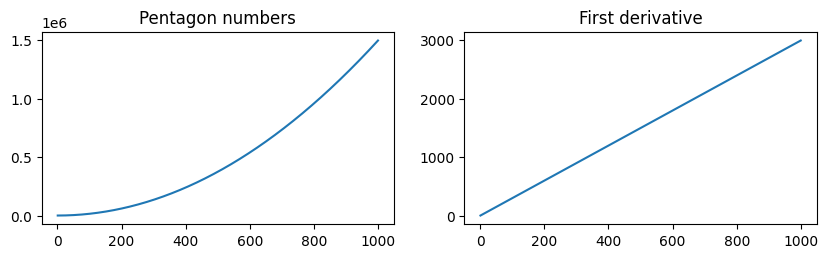

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (10, 2.5))
axes[0].plot(ns, pentagons)
axes[0].set_title("Pentagon numbers")
axes[1].plot(ns, first_derivs)
axes[1].set_title("First derivative");

Ok, so now what? Do we just check np.diff for ever increasing windows and check if there are pentagon numbers? We need a way to check if a number is a pentagon number in any case. Can I reverse engineer the equation somehow? I`ll transfer my thoughts from a few pages of paper notebook here...

if $x = \frac{1}{2}n(3n -1)$

inverting for y: 

$$2x = 3n^2 -n$$
$$3n^2-n-2x = 0$$

So we can solve the quadratic equation where $a = 3, b = -1, c = -2x$:

$$n=\frac{-b +- \sqrt{b^2 - 4ac}}{2a}$$

plug in a, b and c:

$$n=\frac{1 - \sqrt{1 + 24x}}{6}$$ 
or
$$n=\frac{1 + \sqrt{1 + 24x}}{6}$$

But since we cannot have negative Ns, the first term cant be true so we have to find the natural numbers with the second equation. If we replace the division with a modulus we`re there I think: If a number is a pentagon number, the equation

$$ (1 + \sqrt{1+24x}) \% 6 == 0$$ 

In [51]:
def is_pentagon_number(p):
    return (1+np.sqrt((24*p) + 1))%6 ==0 

In [62]:
i = 1
D = None
while not D:
    i+= 1
    pk = make_pentagon_number(i)
    for j in range(1, i):
        pj = make_pentagon_number(j)
        if is_pentagon_number(pk - pj) and is_pentagon_number(pk+pj):
            D = int(np.abs(pk-pj))
print(D)   

5482660
